In [1]:
import data_utils_n as d
import solver as s
import faceFront as fF
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from pathlib2 import Path

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
((faces, facetargets), (glasses, glassestargets)) = d.loadimages()
putfaceinput,putfacetarget =  d.imagesToDataSetTensor((faces, facetargets),100,100)
print(putfaceinput.shape,putfacetarget.shape)

notin 95 00961018
notin 94 00952009
notin 93 00942011
notin 92 00931016
notin 91 00921017
notin 90 00911016
notin 99 01001016
notin 98 00991016
notin 97 00982011
notin 96 00971016
notin 88 00892015
notin 87 00881028
notin 86 00871015
notin 85 00861017
notin 84 00852013
notin 83 00842011
notin 82 00831020
notin 81 00822011
notin 80 00811016
notin 89 00901018
notin 78 00792011
notin 77 00782012
notin 76 00771016
notin 75 00761017
notin 74 00752010
notin 73 00742013
notin 72 00731016
notin 71 00721016
notin 70 00711014
notin 79 00801012
notin 68 00691014
notin 67 00681017
notin 66 00672019
notin 65 00661017
notin 64 00651019
notin 63 00642012
notin 62 00631019
notin 61 00622010
notin 60 00611015
notin 69 00701018
notin 53 00541012
notin 59 00601019
notin 58 00591017
notin 57 00582013
notin 56 00571016
notin 55 00561019
notin 54 00552010
notin 52 00531016
notin 51 00522011
notin 50 00512011
notin 48 00492011
notin 47 00481016
notin 46 00471016
notin 45 00461017
notin 44 00451014
notin 43 0

In [3]:
lfwinput,lfwtarget = d.lfw_loadimages()

13233
torch.Size([13233, 1, 64, 64]) torch.Size([13233, 1, 64, 64])


In [19]:
traindata= (torch.cat((putfaceinput,lfwinput),0),torch.cat((putfacetarget,lfwtarget),0))
#traindata = (putfaceinput,putfacetarget)
#traindata= (lfwinput,lfwtarget)
#torch.save(traindata,"traindata-put.pt")

In [2]:
traindata = torch.load("traindata.pt")

Train size: 2
Img size:  torch.Size([1, 64, 64])
Segmentation size:  torch.Size([1, 64, 64])


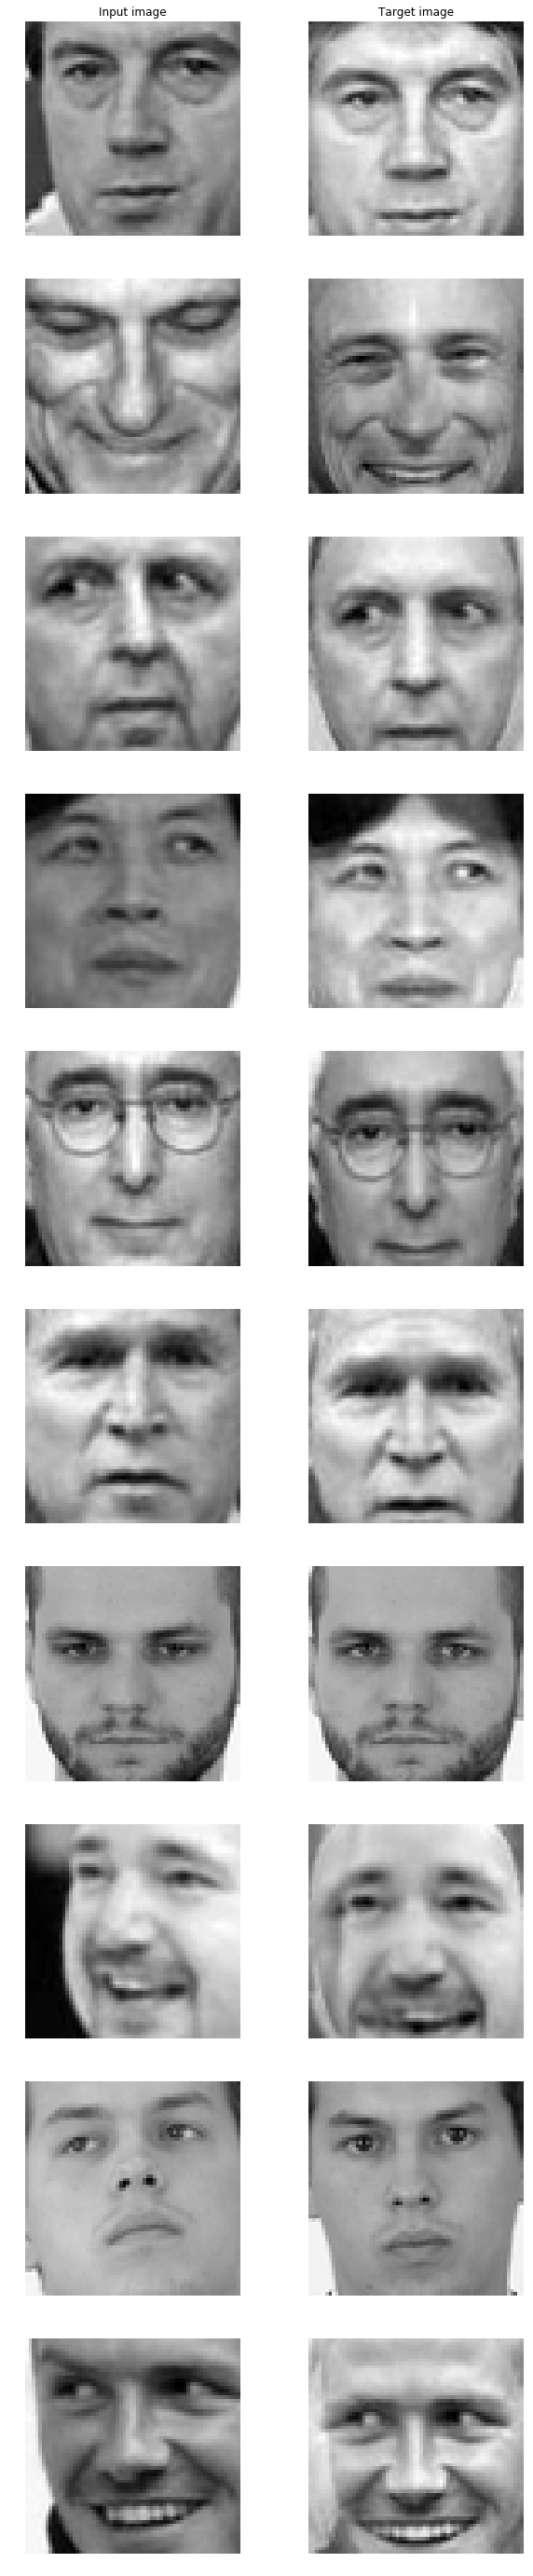

In [5]:
import random
print("Train size: %i" % len(traindata))
print("Img size: ", traindata[0][0].size())
print("Segmentation size: ", traindata[0][1].size())

num_example_imgs = 10
plt.figure(figsize=(10, 5 * num_example_imgs))
for i,r in enumerate(random.sample(range (0,traindata[0].size(0)),num_example_imgs)):#(0,num_example_imgs): 

    plt.subplot(num_example_imgs, 2, i * 2 + 1)
    plt.imshow(traindata[0][r].numpy().squeeze(), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Input image")
    
    # target
    plt.subplot(num_example_imgs, 2, i * 2 + 2)
    plt.imshow(traindata[1][r].numpy().squeeze(), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Target image")
plt.show()

In [7]:
#load model
myNetwork = Path("facefronter-5000epochs.pt")
if myNetwork.is_file():
    print("Saved model exists...!!!")
    network = torch.load("facefronter-5000epochs.pt")
    if torch.cuda.is_available():
        print("cuda")
        #network.cuda()
else:
    #network = fF.FaceFront()
    print("Creating model...!!!")
    if tor7070707070ch.cuda.is_available():
        print("cuda")
        #network.cuda()
print("model finsihed")

Saved model exists...!!!
cuda
model finsihed


/usr/lib/python3.6/site-packages/torch/serialization.py:316: SourceChangeWarning: source code of class 'faceFront.FaceFront' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [20]:
#trainlfw=(finputs,ftargets)
#network = fF.FaceFront()
overfit_solver = s.Solver(optim=torch.optim.Adam,optim_args={"lr": 1e-4})
overfit_solver.train(network, traindata, num_epochs=5000,epochsize=100)

torch.save(network.cpu(), 'facefronter-'+num_epochs*3+'epochs.pt')


inputs:  torch.Size([22087, 1, 64, 64]) targets:  torch.Size([22087, 1, 64, 64])
START TRAIN.
epoche:  0 loss: 4019.70947265625
epoche:  1 loss: 2562.048583984375
epoche:  2 loss: 2914.39453125
epoche:  3 loss: 2405.081298828125
epoche:  4 loss: 3050.057373046875
epoche:  5 loss: 2266.249755859375
epoche:  6 loss: 2077.6728515625
epoche:  7 loss: 2274.765625
epoche:  8 loss: 2393.14453125
epoche:  9 loss: 2807.725341796875
epoche:  10 loss: 2343.03857421875
epoche:  11 loss: 2518.20947265625
epoche:  12 loss: 2223.21533203125
epoche:  13 loss: 2725.624267578125
epoche:  14 loss: 1996.8338623046875
epoche:  15 loss: 2477.190185546875
epoche:  16 loss: 2298.4375
epoche:  17 loss: 2129.12548828125
epoche:  18 loss: 3187.334228515625
epoche:  19 loss: 2110.254638671875
epoche:  20 loss: 2371.80078125
epoche:  21 loss: 2175.30126953125
epoche:  22 loss: 2001.068115234375
epoche:  23 loss: 2497.10546875
epoche:  24 loss: 2504.1083984375
epoche:  25 loss: 2799.57861328125
epoche:  26 loss: 23

KeyboardInterrupt: 

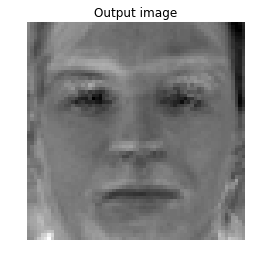

In [16]:
network = network.cpu()
a = torch.ones(64,64)
output = network(Variable(a.view(1,1,64,64)))
plt.imshow(output.view(64,64).data.numpy(), cmap='gray')
#plt.imshow(a.view(64,64).numpy(), cmap='gray')

plt.axis('off')
plt.title("Output image")

# target
#plt.imshow(a.view(64,64).numpy(), cmap='gray')
#plt.axis('off')
#plt.ti===tle("Target image")
plt.show()

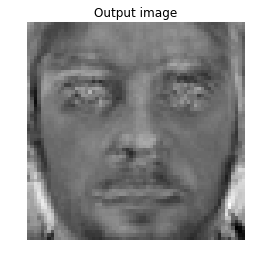

In [17]:
network = network.cpu()
a = torch.randn(64,64)
output = network(Variable(a.view(1,1,64,64)))
plt.imshow(output.view(64,64).data.numpy(), cmap='gray')
#plt.imshow(a.view(64,64).numpy(), cmap='gray')

plt.axis('off')
plt.title("Output image")

# target
#plt.imshow(a.view(64,64).numpy(), cmap='gray')
#plt.axis('off')
#plt.title("Target image")
plt.show()

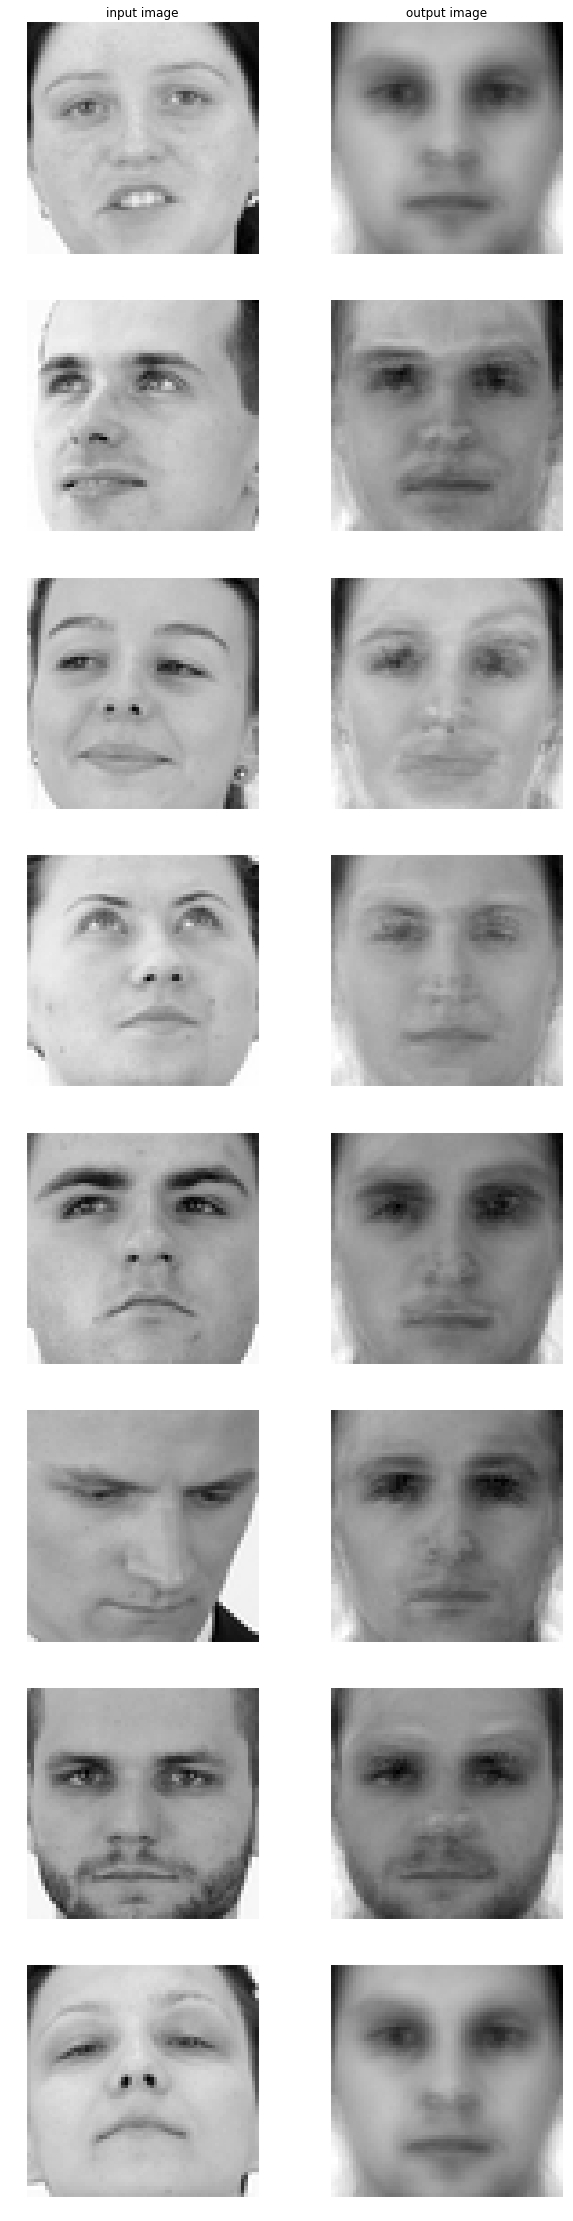

In [18]:
num_example_imgs = 8
plt.figure(figsize=(10, 5 * num_example_imgs))
for i in range (0,num_example_imgs):#, (img, target) in enumerate(f_train[:num_example_imgs]):
    # imgtrain_data
    #print(target.numpy())
    plt.subplot(num_example_imgs, 2, i * 2 + 2)
    a = traindata[0][i*100]
    output = network(Variable(a.view(1,1,64,64)))
    plt.imshow(output.view(64,64).data.numpy(), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("output image")
    
    # target
    plt.subplot(num_example_imgs, 2, i * 2 + 1)
    plt.imshow(a.view(64,64).numpy(), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("input image")
        
plt.show()